# ***Import libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Load Bank Personal Loan Modelling dataset & explore***

Dữ liệu được lấy từ https://www.kaggle.com/teertha/personal-loan-modeling

In [ ]:
loan_dataset = pd.read_csv('Loan Modelling Thera Bank.csv')
loan_dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
loan_dataset.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
loan_dataset.info()

In [ ]:
loan_dataset.describe()

# ***Data visualization***

In [ ]:
sns.pairplot(loan_dataset,
             hue='Personal Loan',
             vars=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                   'Education', 'Mortgage', 'Securities Account',
                   'CD Account', 'Online', 'CreditCard'])

In [ ]:
sns.countplot(loan_dataset['Personal Loan'])

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(loan_dataset)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_dataset.corr(), annot=True, cmap='coolwarm', linewidths=2)

# ***Data preprocessing***

***Normalization***

In [ ]:
X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
# X = (X-X.mean())/X.var()
X = (X-X.min())/(X.max()-X.min())
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [ ]:
X.describe()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(X)

In [ ]:
y = loan_dataset['Personal Loan']
y

,Personal Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


## Chia dữ liệu làm 2 phần training và testing

- Training chiếm 80 % dữ liệu
- Testing chiếm 20 % dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (4000, 12) (4000,)
Dữ liệu testing =  (1000, 12) (1000,)


# ***Personal Loan Modeling***

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# ***K - Nearest Neightbor Classifier***

# Bài toán phân loại sử dụng KNN

Mục tiêu:

- Xây dựng được mô hình KNN sử dụng thư viện sklearn.
- Ứng dụng, hiểu cách áp dụng mô hình KNN vào giải quyết bài toán thực tế (vd: phân loại)
- Sử dụng độ đo Accuracy, Precision, Recall để làm độ đo đánh giá chất lượng mô hình.

Vấn đề:
- Có một tập các dữ liệu không có nhãn, làm sao để biết dữ liệu này là thuộc về nhãn nào.
- => Xây dựng mô hình học máy có thể phân loại.  

Dữ liệu:
- Dữ liệu Bank Personal Loan Modelling
- Xem thêm: https://www.kaggle.com/teertha/personal-loan-modeling

Bài toán:
- Input: 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 0 hoặc 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# **1.** Mô hình KNN
Sử dụng thư viện sklearn để xây dựng mô hình
- `KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)`
- Số láng giềng: n_neighbors = 5
- Độ đo khoảng cách: Euclide p = 2

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

# **2.** Testing KNN model

## Đánh giá theo các độ đo

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Testing...\n")
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Testing...

Accuracy:  0.952
Precision:  0.9166666666666666
Recall:  0.5


# **3.** Lựa chọn mô hình

## Lựa chọn số lượng láng giềng
- Thay đổi số lượng láng riềng tìm giá trị cho kết quả phân loại tốt nhất

## Lựa chọn thuộc tính
- Các thuộc tính: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'.
- Thử loại bỏ từng thuộc tính ra khỏi dữ liệu xem chúng ảnh hưởng như thế nào tới kết quả phân loại.
- Các thuộc tính nào nên được sử dụng để cho kết quả phân loại tốt nhất ?

## Lựa chọn hàm tính khoảng cách
- Hàm tính khoảng cách: minkowski, manhattan, euclidean, chebyshev
- Hàm tính khoảng cách nào là tốt nhất cho bài toán này ?

# Đánh giá việc lựa chọn số lượng láng giềng

In [ ]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
models = []
for k in n_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)

In [ ]:
acc, pre, re = [], [], []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].plot(n_neighbors, acc, marker= "v")
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của số lượng láng giềng")

axs[1].plot(n_neighbors, pre, marker= "v")
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("Precision")
axs[1].set_title("Ảnh hưởng của số lượng láng giềng")

axs[2].plot(n_neighbors, re, marker= "v")
axs[2].set_xlabel("n_neighbors")
axs[2].set_ylabel("Recall")
axs[2].set_title("Ảnh hưởng của số lượng láng giềng")

plt.show()

# Đánh giá việc lựa chọn thuộc tính

/tmp/ipython-input-4116648648.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(key, rotation=45)
/tmp/ipython-input-4116648648.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(key, rotation=45)
/tmp/ipython-input-4116648648.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(key, rotation=45)


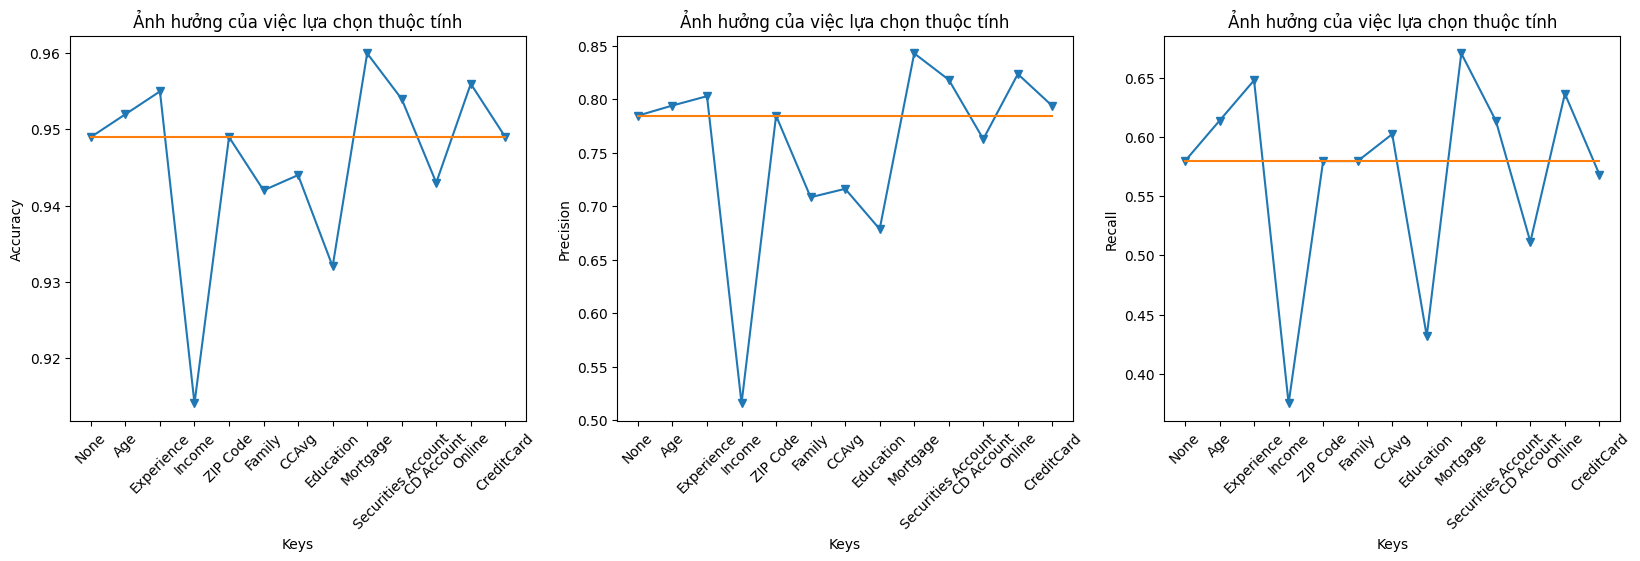

In [ ]:
acc, pre, re = [], [], []
key = ['None','Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for k in key:
    if k == 'None':
      X = loan_dataset.drop(['Personal Loan', ], axis=1)
    else:
      X = loan_dataset.drop(['Personal Loan',k ], axis=1)
    X = (X-X.min())/(X.max()-X.min())
    y = loan_dataset['Personal Loan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].plot(key, acc, marker= "v")
axs[0].set_xlabel("Keys")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của việc lựa chọn thuộc tính")
axs[0].plot(key, [acc[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[0].set_xticklabels(key, rotation=45)

axs[1].plot(key, pre, marker= "v")
axs[1].set_xlabel("Keys")
axs[1].set_ylabel("Precision")
axs[1].set_title("Ảnh hưởng của việc lựa chọn thuộc tính")
axs[1].plot(key, [pre[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[1].set_xticklabels(key, rotation=45)

axs[2].plot(key, re, marker= "v")
axs[2].set_xlabel("Keys")
axs[2].set_ylabel("Recall")
axs[2].set_title("Ảnh hưởng của việc lựa chọn thuộc tính")
axs[2].plot(key, [re[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[2].set_xticklabels(key, rotation=45)

plt.show()

# Đánh giá việc lựa chọn hàm đánh giá khoảng cách

In [ ]:
ps = [1,2,3,4,5,6,7,8,9,10,50, 'inf']
models = []
for p in ps:
    if p == 'inf':
        metric = 'chebyshev'
        p = 2
    else:
        metric = 'minkowski'
    knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = metric, p = p, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)

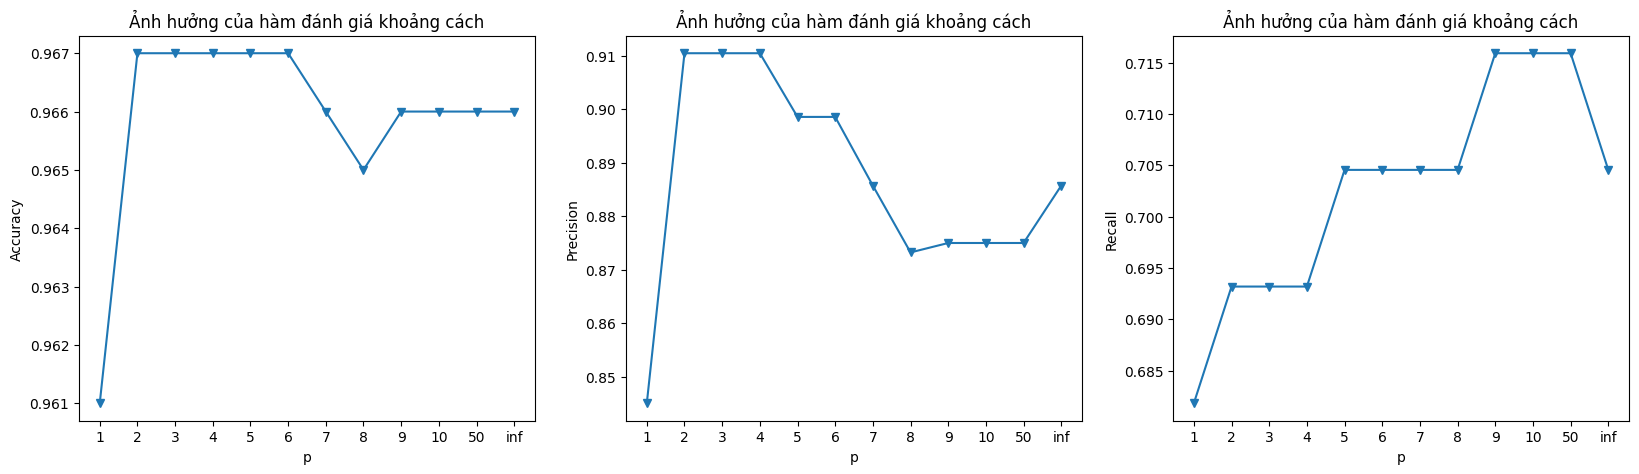

In [ ]:
acc, pre, re = [], [], []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].plot(ps, acc, marker= "v")
axs[0].set_xlabel("p")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của hàm đánh giá khoảng cách")

axs[1].plot(ps, pre, marker= "v")
axs[1].set_xlabel("p")
axs[1].set_ylabel("Precision")
axs[1].set_title("Ảnh hưởng của hàm đánh giá khoảng cách")

axs[2].plot(ps, re, marker= "v")
axs[2].set_xlabel("p")
axs[2].set_ylabel("Recall")
axs[2].set_title("Ảnh hưởng của hàm đánh giá khoảng cách")

plt.show()